# Avacado Project

Submitted by: Prashant Shekhar

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

## Importing dataset:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing data
df=pd.read_csv("D:/avacado.csv") #Reading csv file
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Above is the data set of Avacado.And firstly i have to build a model which predicts the average price of Avacado.So it is clear that Average Price is my target and this particular problem is Regression Problem.

# Data description:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

## EDA:

In [8]:
#Checking shape of dataset
df.shape

(18249, 14)

In my dataset i have 18249 rows and 14 columns.

In [9]:
#Checking all column names
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [10]:
#Checking the data types of all columns
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

I have Date, type and region columns as object type data.Unnamed:0 and year as integer type data, and rest all columns as float type data.

In [11]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
#Checking unique values of each column
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Above are the unique value counts of each column in the dataset.

And the Unnnamed:0 column acts as index column so it has nothing to do with model training so let me drop it here itself.

In [13]:
#Droping Unnamed column
df = df.drop(["Unnamed: 0"],axis=1)

In [14]:
#Checking null values in the dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

It looks clear that i don't have any null values in my dataset.

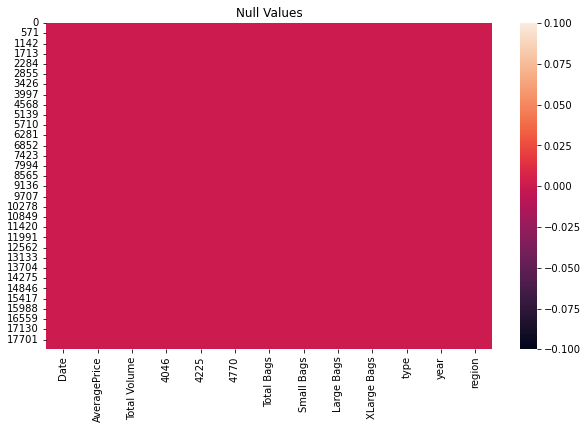

In [15]:
#Visualizeing null values
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

I can clearly say by visualization that i don't have any null values in any columns of my dataset.

In [16]:
#Checking unique values of target column
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

Above are the unique value count of target column.

In [17]:
#Checking for empty observations
df.loc[df['AveragePrice'] == " "]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


So i don't have any empty observations in my target column.

In [18]:
#Checking value counts of target column
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

Above are the value counts of target column.

## Feature Engineering:

Extracting Date and month from Date column.

In [19]:
df["Date"]=pd.to_datetime(df["Date"])

In [20]:

df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

I can observe that Date column data type has changed to datetime.

In [22]:
#Extracting month from Date column
df["Month"]=df["Date"].dt.month

In [23]:
#Extracting day from Date column
df["Day"]=df["Date"].dt.day

In [24]:

df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


I have extracted day and month column from Date column.And year is as same as existing Year column so no need to extract that column.And after extracing all the necessary columns let me drop Date column.

In [25]:
#Droping Date column
df = df.drop(["Date"],axis=1)

In [26]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [27]:
#Checking description of data set
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.372842,15.466984
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.525034,8.984552
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,10.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


Above is the data description of the dataset.

## Visualization:

## Univariate Analysis:

Above are the two types of columns in the dataset.i.e.,Continuous columns and Categorical columns.

In [31]:

continuous_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_cols = ['year', 'Day', 'Month', 'type', 'region']

Above are the two types of columns in the dataset.i.e.,Continuous columns and Categorical columns.

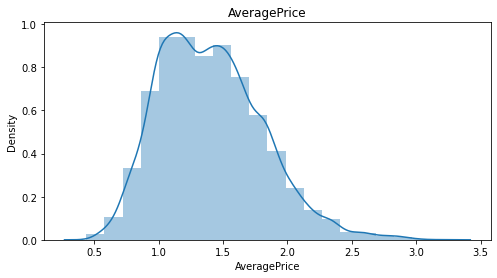

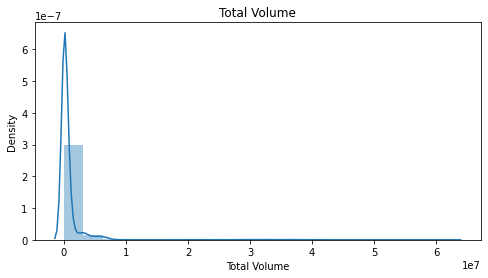

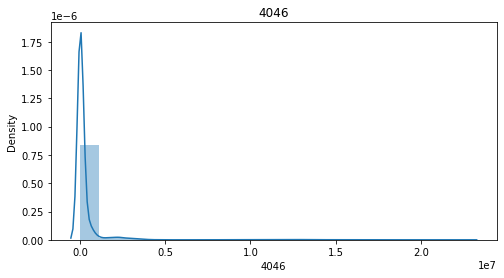

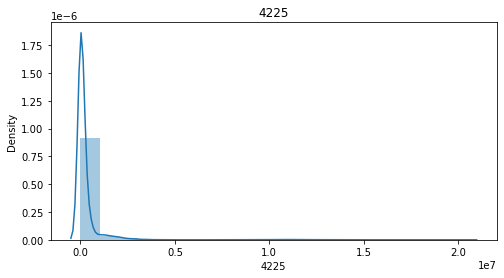

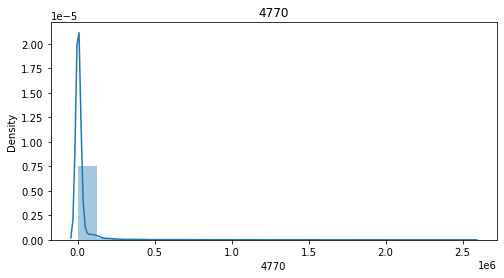

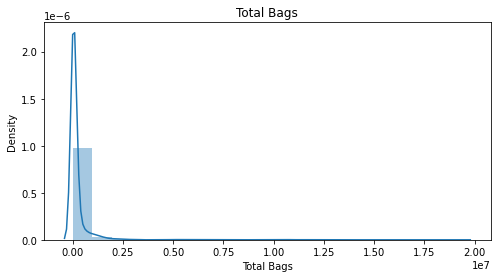

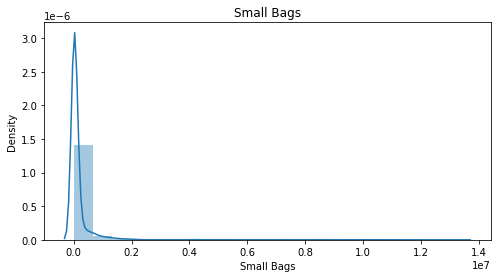

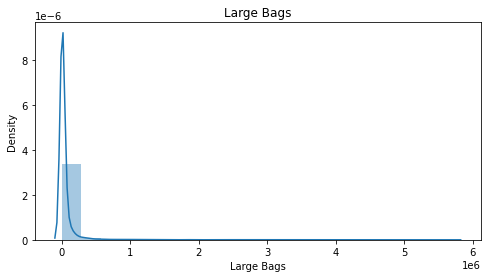

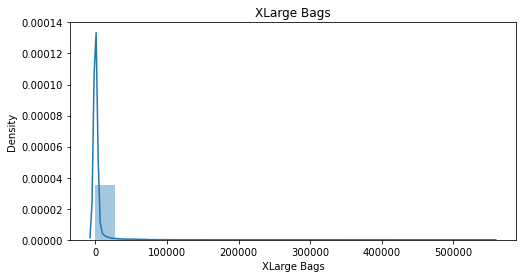

In [32]:
for i in df[continuous_cols]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 20)
    plt.title(i)
    plt.show()

Except AveragePrice all the other columns are skewed.

In [33]:

df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

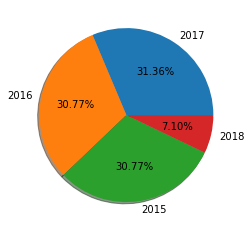

In [34]:
#Ploting pie chart for years
labels='2017','2016','2015','2018'
fig, ax = plt.subplots()
ax.pie(df['year'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In 2017 the sales of avacado with average prize is more comparitivly.

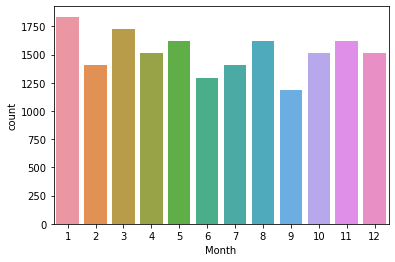

In [35]:
#Count plot for Month
sns.countplot(df['Month']);

In january and march the count is more.

In [37]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

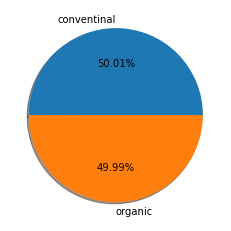

In [38]:
labels='conventinal','organic'
fig, ax = plt.subplots()
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Both conventional and organic avacado has same count.

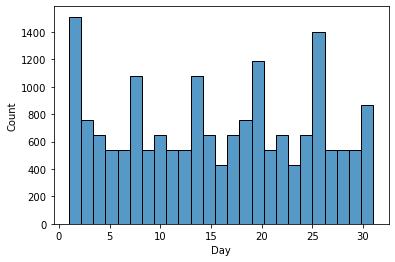

In [39]:
#Count plot for Month
sns.histplot(df['Day']);

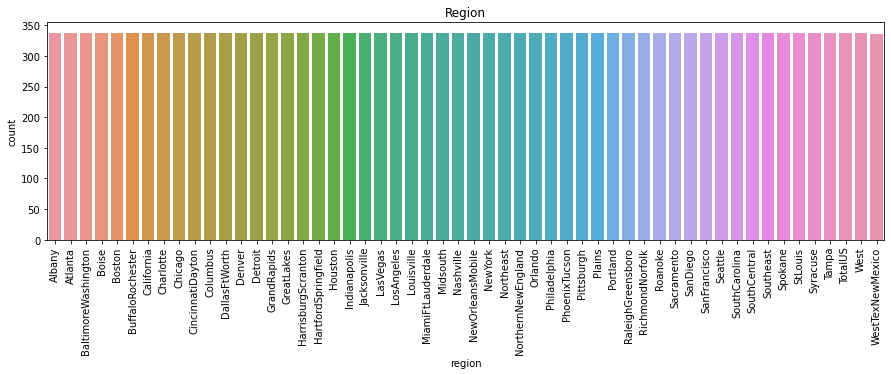

In [40]:
plt.figure(figsize=(15,4))
sns.countplot(df["region"])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

In all the regions the count is almost same which means there is equal importance in the regions for avacado.

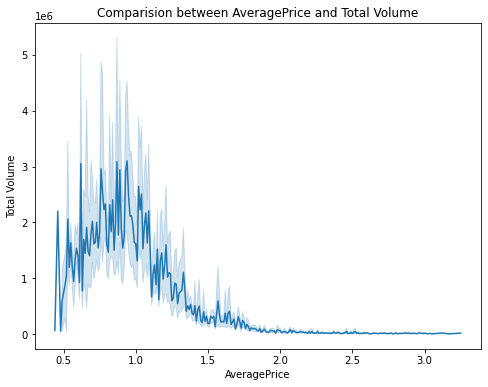

In [42]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between AveragePrice and Total Volume')
sns.lineplot(df['AveragePrice'],df['Total Volume']);

As the average price is between 0.5to1.5 then the Total Volume is between 0-3.

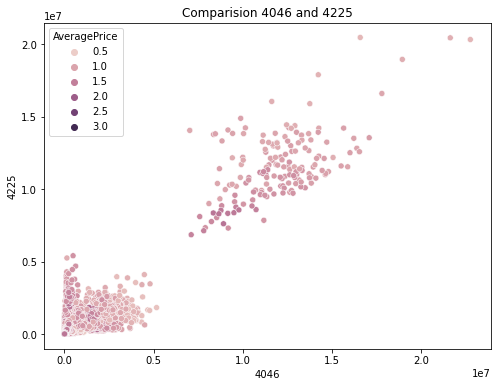

In [43]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision 4046 and 4225')
sns.scatterplot(df['4046'],df['4225'],hue=df["AveragePrice"]);

The points are dense in 0 to 0.5 for both 4046 and 4225 PLU, which means these both has less AveragePrice count.

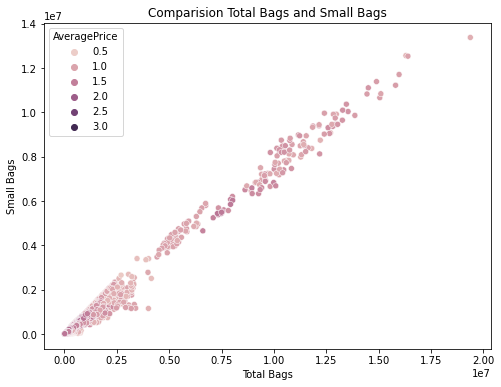

In [44]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(df['Total Bags'],df['Small Bags'],hue=df["AveragePrice"]);

I can observe a linear distribution of Total bags and Small bags.

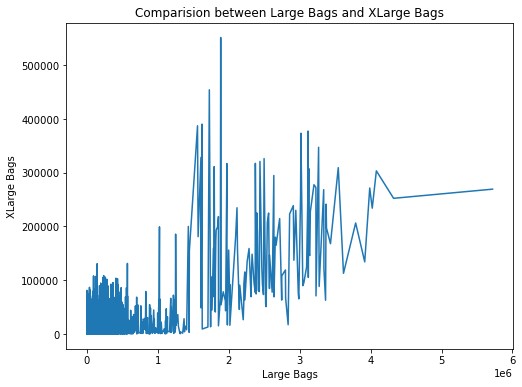

In [45]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Large Bags and XLarge Bags')
sns.lineplot(df['Large Bags'],df['XLarge Bags']);

I can observe some extreme outliers here.So i have to take care of it.

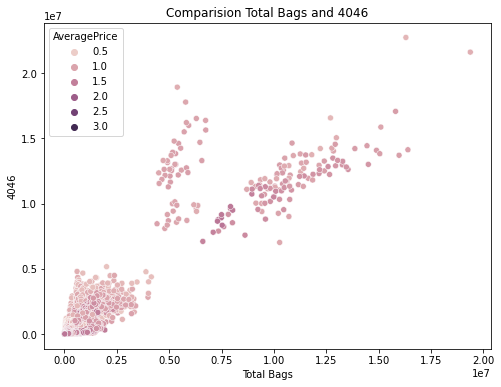

In [46]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and 4046')
sns.scatterplot(df['Total Bags'],df['4046'],hue=df["AveragePrice"]);

Above plot says that the count is more with less Total Bags and 4046 PLU.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

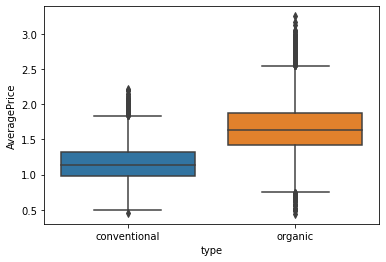

In [47]:

sns.boxplot(x='type',y='AveragePrice',data=df)

Average price is more for Organic avacado.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

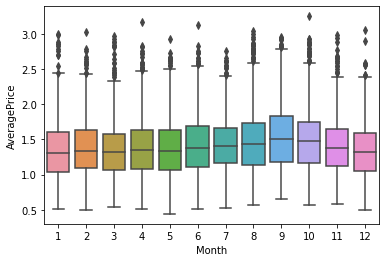

In [49]:
sns.boxplot(x='Month',y='AveragePrice',data=df)

In september the Average Price for Avacado is high.

## Multivariate Analysis:

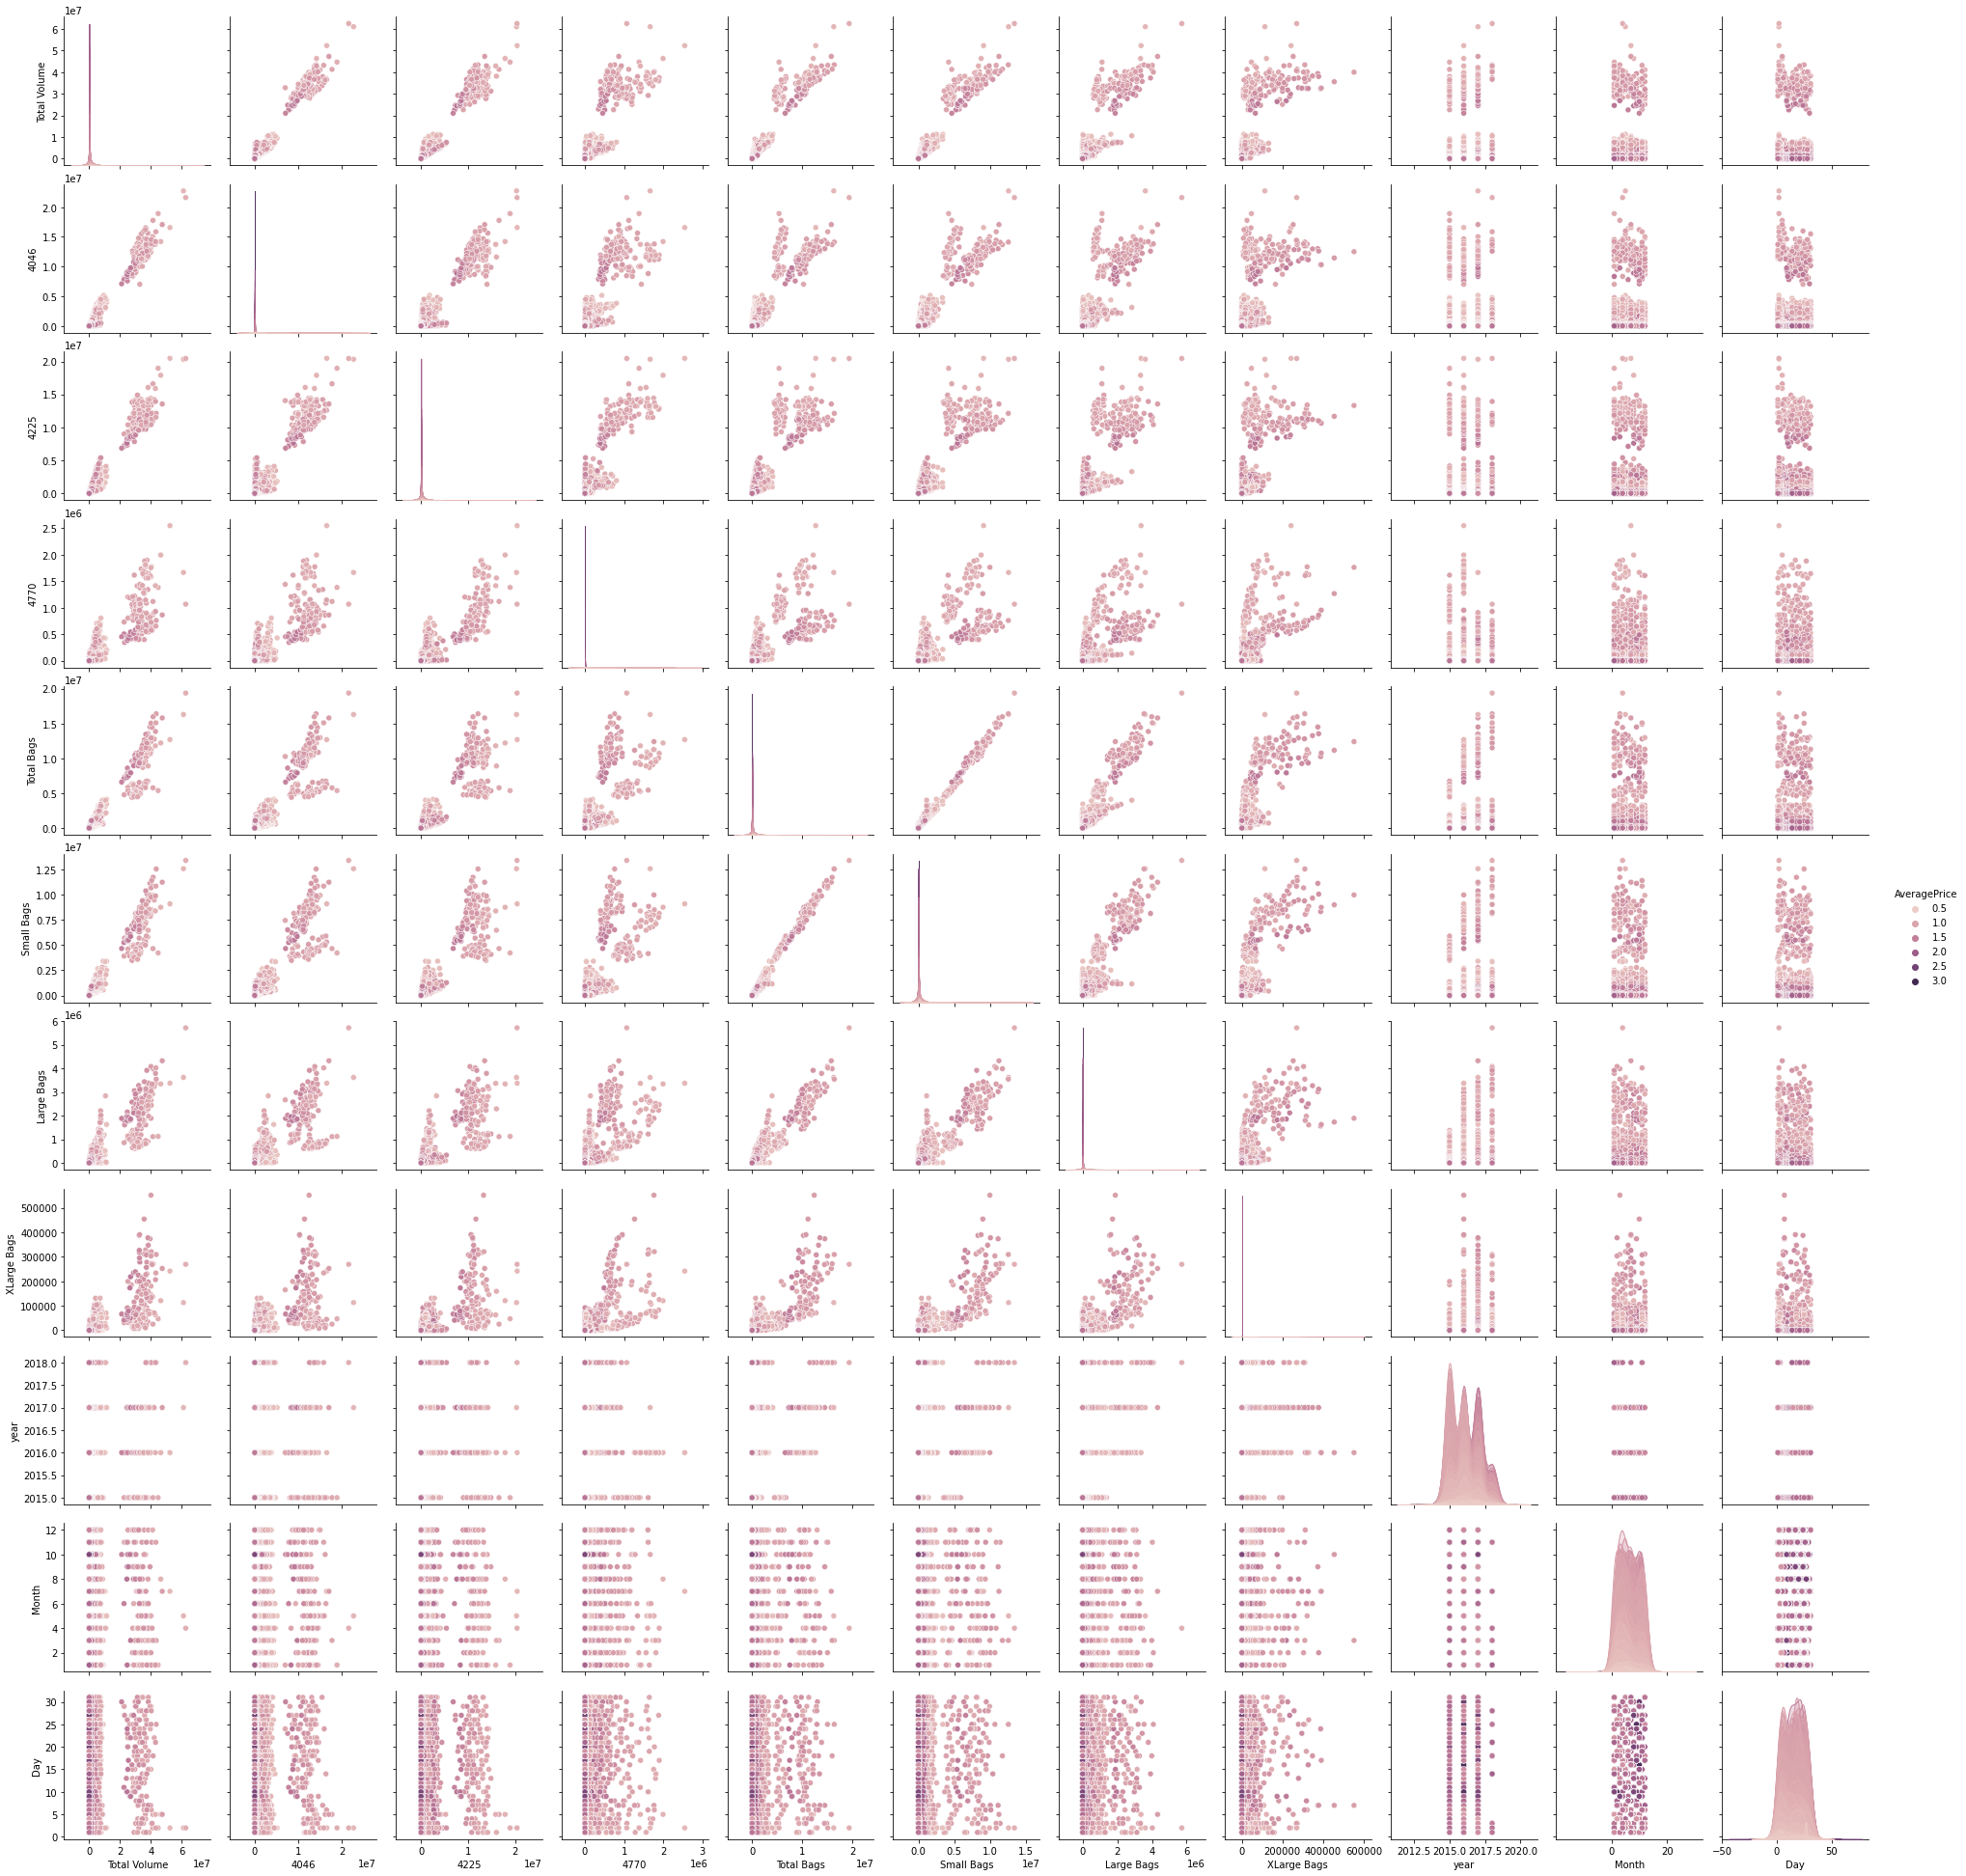

In [50]:
#pair ploting for df
sns.pairplot(df,hue="AveragePrice")

Most of the pair plots are linear and also there are some outliers in some of the features.Lets have a look into that.

## Data Cleaning:

## Checking for outliers:

<AxesSubplot:>

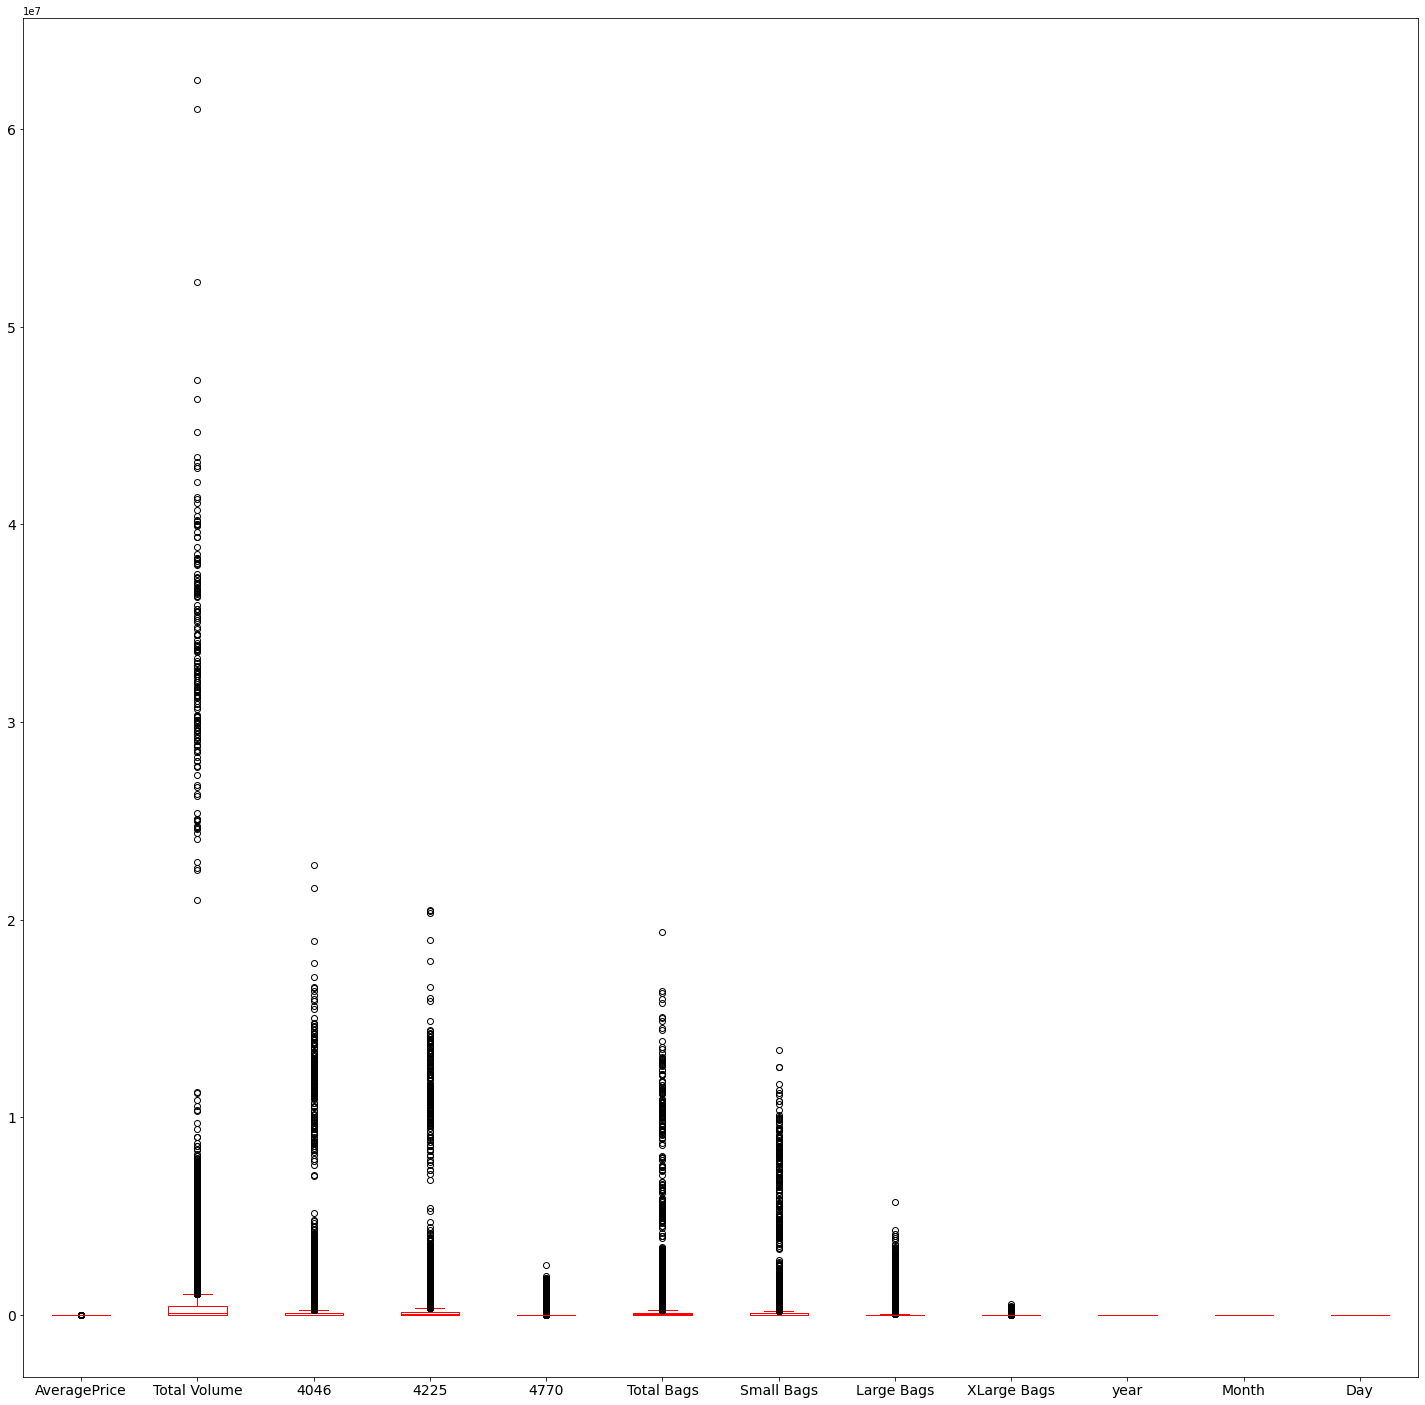

In [51]:
df.plot(kind='box',fontsize=14,figsize=(25,25),color='r')

In all the columns except year, month and day there are outliers.And these year,month,day are somehow categorical no need to check outliers for these columns.

And in all other columns i can see a huge number of outliers i have to treat them.

In my target column i have outliers but i'll not treat them as i don't want to manipulate my target column.

## Removing Outliers:

i) Zscore method:

In [53]:
#Features having outliers
features=df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


I have removed the outliers using zscore method.

In [55]:
#Checking shape of new dataset
df_new.shape

(17782, 14)

In my new dataset i have 17782 rows and 14 columns.

In [57]:
#Checking shape of old dataset
df.shape

(18249, 14)

In my old dataset i was having 18249 rows and 14 columns.

In [58]:
#Checking dataloss
Dataloss = (((18249-17782)/18249)*100)
Dataloss

2.55904433119623


Using Zscore i have 2.56% data loss.Which is less than 10%.But still let me have a look into IQR method also.

## ii) IQR method:

In [59]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed outliers using IQR method.

In [60]:
#Checking shape of new dataset
df_1.shape

(11747, 14)

After removing outliers using IQR method i got 11747 rows and 14 column.

In [61]:
#Checking shape of old dataset
df.shape

(18249, 14)


In my old dataset i was having 18249 rows and 14 columns.

In [62]:
#Checking dataloss
Dataloss = (((18249-11747)/18249)*100)
Dataloss

35.62934955340019


In IQR method i can see a great data loss.So let me stick on to Zscore method itself.

## Checking for Skewness:

In [64]:
#Checking for skewness
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

I can notice skewness in almost all columns except year, month and Day.

## Removing Skewness:

In [66]:
#list of skewed features
skew_fea=["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]

Taking all the columns with skewness as a list with variable skew_fea.

In [68]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo-johnson to remove skewness.

In [69]:
#Removing skewness using yeo-johnson
df_new[skew_fea] = scaler.fit_transform(df_new[skew_fea].values)

In [70]:
#Removing skewness in H using log1p
df_new["XLarge Bags"]=np.log1p(df_new["XLarge Bags"])

In [71]:
#Checking skewness after removing skewness
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64


Now I can see that the skewness is removed almost from my dataset.

## Label Encoding:

In [72]:
cols = ["type","region"]

Taking all the categorical columns as a list cols.

In [74]:

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cols]= df_new[cols].apply(LE.fit_transform)

Using Label encoder to encode categorical data.

In [75]:
df_new[cols].head()

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


These are my cols after encoding.

In [76]:

df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,6,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11,29


## Correlation using heat map:

In [77]:
cor=df_new.corr()

Checking Correlation.

In [78]:

cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.071568,0.058266
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.015294,-0.010471
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.014000,-0.009166
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.019092,-0.008019
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.012151,-0.000721
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.004350,-0.007650
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.002533,-0.003569
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.004320,-0.005833
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.015762,0.012778
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.003290,-0.003108


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

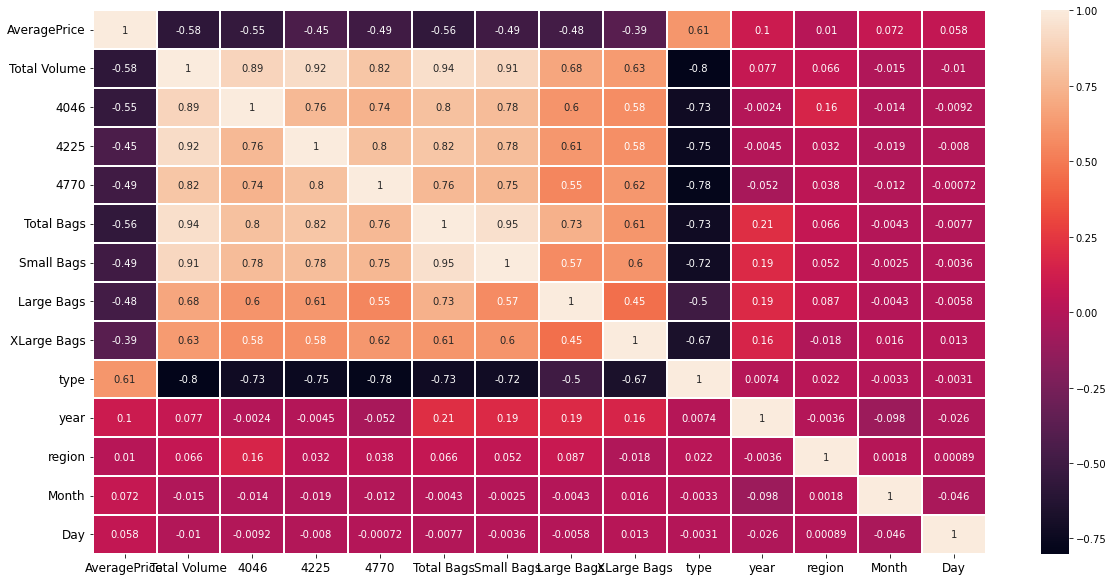

In [79]:

plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),linewidths=.1,annot=True)
plt.yticks(rotation=0,fontsize=12);
plt.xticks(rotation=0,fontsize=12);

By looks into the heat map these are my observations on independent features.

Total Bags and Small Bags are highly correlated with each other.
Total Volume and Small Bags are highly correlated with each other.
Total Volume and Total Bags are highly correlated with each other.
Total Volume and 4225 are highly correlated with each other.
I can see negative correlation but not more than -0.8 so let it be.
To get better insight on target correlation let me plot bar plot.

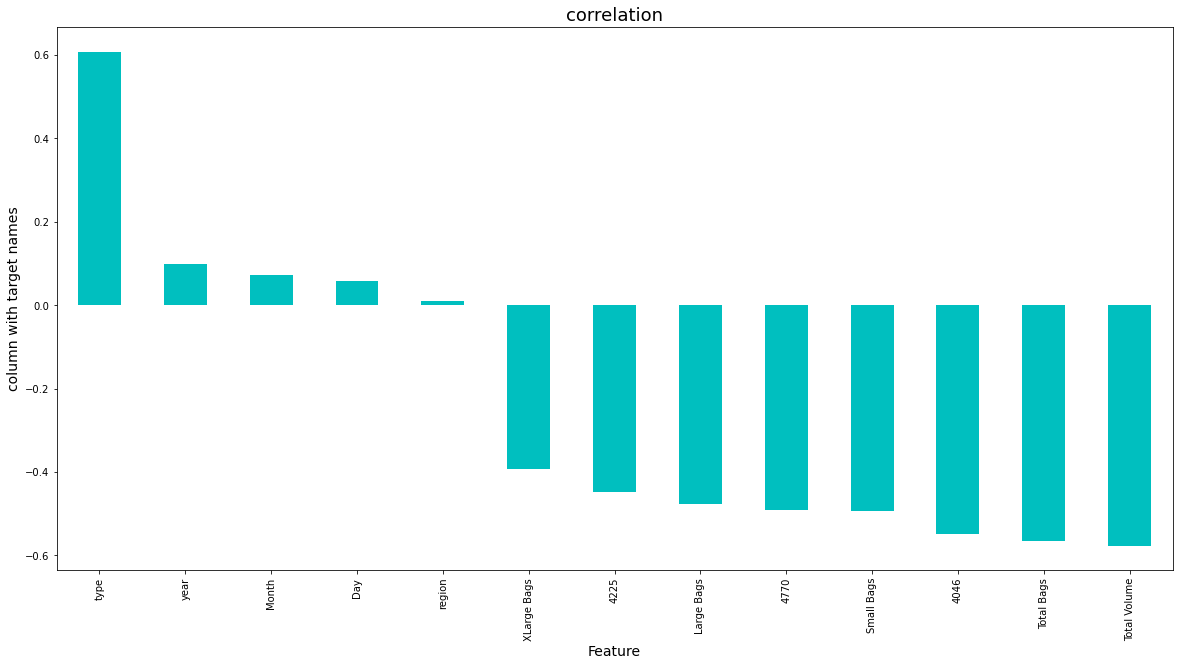

In [80]:
plt.figure(figsize=(20,10))
df_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Day and region has very less correlation with the target variable so i can drop those columns.

In [81]:
#Droping Day and region column
df_new = df_new.drop(["Day"],axis=1)
df_new = df_new.drop(["region"],axis=1)

## Preprocessing:

In [82]:
x = df_new.drop("AveragePrice",axis=1)
y = df_new["AveragePrice"]

Assigned y as target variable and x as remaining features.

## Scaling the data using Standard Scaler:

In [83]:

#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [84]:

ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

I have scaled my data using standard scaler.

## Using VIF(Variance inflation factor) to remove multicolinearity:

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,51.737758,Total Volume
1,6.807430,4046
2,11.159354,4225
3,3.943322,4770
4,34.399137,Total Bags
5,16.626231,Small Bags
6,3.462229,Large Bags
7,2.059065,XLarge Bags
8,3.718878,type
9,1.344705,year


Since i can see high VIF for Total volume first let me drop that column and check VIF again.

In [86]:
#Droping Total Volume column
X = X.drop(["Total Volume"],axis=1)

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,3.535544,4046
1,4.267691,4225
2,3.928942,4770
3,24.471985,Total Bags
4,16.625988,Small Bags
5,3.418790,Large Bags
6,2.046775,XLarge Bags
7,3.487117,type
8,1.342864,year
9,1.018935,Month



Even after removing Total volume i can see high VIF for Total bags so let me drop it.

In [88]:

#Droping Total Bags column
X = X.drop(["Total Bags"],axis=1)

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,3.517055,4046
1,4.124058,4225
2,3.928634,4770
3,4.081245,Small Bags
4,1.862150,Large Bags
5,2.046572,XLarge Bags
6,3.483920,type
7,1.319514,year
8,1.018652,Month


Now the multicolinearity issue has solved.So i can proceed with model building.

## Finding Best Random State and Accuracy:

In [90]:
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = KNN()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7482906727902638  on Random_state  113


I got best accuracy and random state.

## Regression Algorithms:

In [93]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) Linear Regression:

In [94]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.4757025380048676
mean_squared_error: 0.08422630297516358
mean_absolute_error: 0.22407848176573944
root_mean_squared_error: 0.2902176820511865


## ii) RandomForestRegressor:

In [96]:

RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8080460777589403
mean_squared_error: 0.030836634513589506
mean_absolute_error: 0.12183008434864104
root_mean_squared_error: 0.17560362898752835


## iii) SGD:

In [97]:
sgd=SGDRegressor()
sgd.fit(X_train,y_train)
pred=sgd.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.470583445403439
mean_squared_error: 0.08504866485112063
mean_absolute_error: 0.22549752982626303
root_mean_squared_error: 0.2916310423310945


## iv) Gradient Boosting:

In [98]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6561428856708473
mean_squared_error: 0.055239278445947455
mean_absolute_error: 0.1767512367914835
root_mean_squared_error: 0.23503037770881333


## v) KNN:

In [99]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7409485887611427
mean_squared_error: 0.0416155793814433
mean_absolute_error: 0.14165135895032802
root_mean_squared_error: 0.20399896906956


Cross Validation:

In [101]:

print(cross_val_score(lr,X,y,cv=5).mean())

0.06964698102072871


In [102]:

print(cross_val_score(RFR,X,y,cv=5).mean())

0.28586113894805026


In [103]:

print(cross_val_score(sgd,X,y,cv=5).mean())

0.04099142327712337


In [104]:

print(cross_val_score(GBR,X,y,cv=5).mean())

0.31358968925658826


In [105]:

print(cross_val_score(knn,X,y,cv=5).mean())

0.11874592586201771


Above are the cross validation scores of each model i have used.

By checking the difference between model accuracy and cross validation score i found KNN as best model.

## Hyper Parameter tuning:

In [106]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [107]:

parameter = {'n_neighbors':[1,2,3,4],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':[10,20,30,40]}

Giving KNN parameters.

In [108]:
GCV=GridSearchCV(KNN(),parameter,cv=5)

In [109]:

GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [10, 20, 30, 40],
                         'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})


Tuning the model with GCV.

In [111]:
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': 10, 'n_neighbors': 4, 'weights': 'distance'}

Got the best parameters.

In [112]:
Final_mod=KNN(algorithm='brute',n_jobs=10,n_neighbors=3,weights='distance')
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 75.10578177240487
mean_squared_error: 0.03999157193682416
mean_absolute_error: 0.13520639957921285
RMSE value: 0.19997892873206458


This is my model after tuning.I got 75.10 as r2_score which is good

## Saving the model:

In [114]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Avacado.pkl")

['Avacado.pkl']

## Predictions:

In [115]:
# Loading the saved model
model=joblib.load("Avacado.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1.19164536, 1.59803141, 1.48665951, ..., 1.80540659, 1.6479882 ,
       1.92032225])

Above are the predicted values.

In [117]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334
Predicted,1.191645,1.598031,1.48666,1.285977,1.602593,2.08946,1.058495,1.306925,1.163796,0.956815,...,1.087737,0.868028,1.206688,1.176781,1.588012,1.483835,0.747376,1.805407,1.647988,1.920322
Actual,1.220000,1.640000,1.80000,1.340000,1.360000,2.39000,1.240000,0.780000,1.090000,0.940000,...,1.520000,0.930000,1.190000,1.200000,1.500000,1.410000,0.890000,1.810000,1.550000,1.970000


Above are the predicted and actual values they look almost similar which is good.

# -----------------------------------------------------------------------------------------------------------